Load all packages you need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample


Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [2]:
df = pd.read_csv('../data/diabetes.csv')
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Create a scatterplot for the variables "BMI" and "BloodPressure".

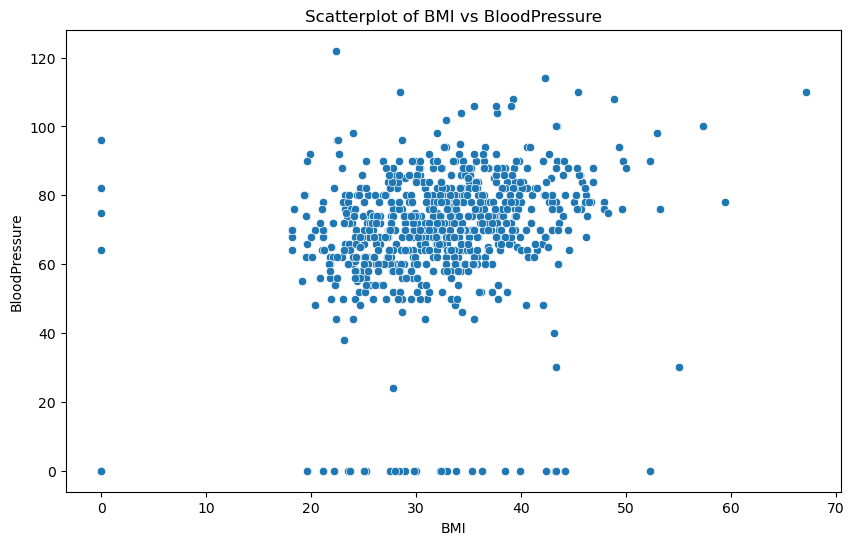

In [3]:
# Create a scatterplot for the variables "BMI" and "BloodPressure"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='BloodPressure', data=df)
plt.title('Scatterplot of BMI vs BloodPressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.show()

We want to perform PCA on these two variables. But before we can do that, we need to normalize the data to avoid weighting the higher "BloodPressure" stronger than "BMI" values. If a variable is normally distributed (bell curve), a good way approach is z-score scaling. <br>
Inspect the histograms of both variables. If they are normally distributed create a dataframe with the normalized "BloodPressure_norm" and "BMI_norm". 

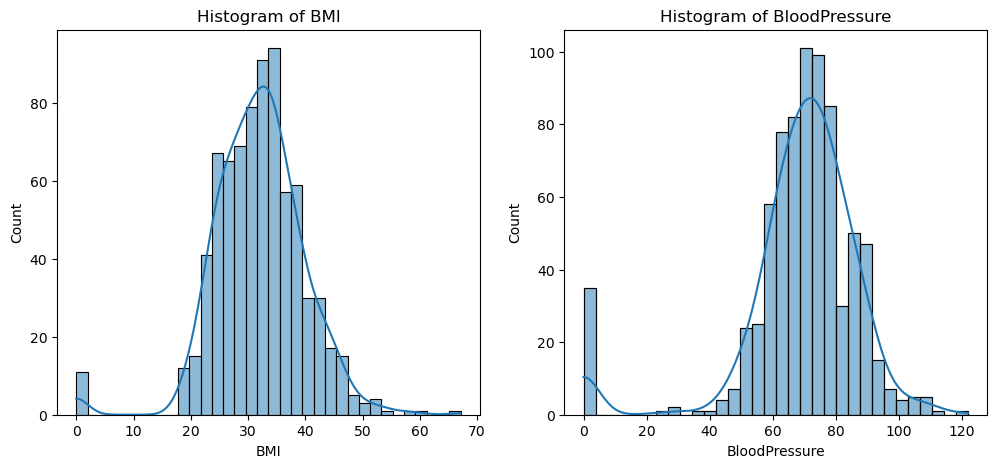

   BMI_norm  BloodPressure_norm
0  0.203880            0.149543
1 -0.683976           -0.160441
2 -1.102537           -0.263769
3 -0.493721           -0.160441
4  1.408828           -1.503707


In [4]:
# Inspect the histograms of both variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True)
plt.title('Histogram of BMI')

plt.subplot(1, 2, 2)
sns.histplot(df['BloodPressure'], kde=True)
plt.title('Histogram of BloodPressure')

plt.show()

# Normalize the data if they are normally distributed
df['BMI_norm'] = (df['BMI'] - df['BMI'].mean()) / df['BMI'].std()
df['BloodPressure_norm'] = (df['BloodPressure'] - df['BloodPressure'].mean()) / df['BloodPressure'].std()

# Create a new dataframe with the normalized variables
df_normalized = df[['BMI_norm', 'BloodPressure_norm']]
print(df_normalized.head())

Normalization is important in Principal Component Analysis (PCA) for the following reasons:

Equal Weighting: Different variables can have different units and scales. For example, "BloodPressure" might have a higher range of values compared to "BMI". Without normalization, variables with larger ranges will dominate the PCA results, leading to biased principal components.

Improved Comparability: Normalizing the data ensures that each variable contributes equally to the analysis. This makes the results more interpretable and comparable.

Avoiding Bias: PCA aims to identify the directions (principal components) that maximize the variance in the data. If the data is not normalized, variables with larger variances will disproportionately influence the principal components, potentially leading to misleading results.

Perform a Principal Component Analyis (PCA) on the two variables and print the eigenvalues, the percentage of the explained variance, and the eigenvectors of the the PCs

In [5]:
from sklearn.decomposition import PCA

# Perform PCA on the normalized variables
pca = PCA(n_components=2)
pca.fit(df_normalized)

# Print the eigenvalues (explained variance)
print("Eigenvalues (Explained Variance):", pca.explained_variance_)

# Print the percentage of the explained variance
print("Percentage of Explained Variance:", pca.explained_variance_ratio_)

# Print the eigenvectors (principal components)
print("Eigenvectors (Principal Components):")
print(pca.components_)



Eigenvalues (Explained Variance): [1.28180529 0.71819471]
Percentage of Explained Variance: [0.64090264 0.35909736]
Eigenvectors (Principal Components):
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Let's break down the results of the PCA (Principal Component Analysis) step by step:

##### 1. Eigenvalues (Explained Variance):
`Eigenvalues (Explained Variance): [1.28180529 0.71819471]`
- These values represent the amount of variance captured by each principal component.
- The first principal component captures approximately 1.28 units of variance, while the second captures approximately 0.72 units of variance.

##### 2. Percentage of Explained Variance
`Percentage of Explained Variance: [0.64090264 0.35909736]`
- These values represent the proportion of the dataset's total variance that is captured by each principal component.
- The first principal component captures about 64.09% of the total variance, and the second captures about 35.91%.
Together, these two components capture 100% of the variance in the dataset.
##### 3. Eigenvectors (Principal Components):
`Eigenvectors (Principal Components):`
`[[ 0.70710678  0.70710678]`
`[-0.70710678  0.70710678]]`
- These vectors represent the directions of the principal components in the feature space.
The first principal component is a combination of the original features with equal weights (0.7071 for both features).
- The second principal component is a combination of the original features with weights of -0.7071 and 0.7071, respectively.

#### Interpretation:
- **Dimensionality** Reduction: PCA reduces the dimensionality of the dataset while retaining most of the variance. In this case, two principal components capture all the variance.
- **Variance Explanation**: The first principal component explains the majority of the variance (64.09%), and the second explains the remaining variance (35.91%).
- **Feature Contribution**: The eigenvectors show how the original features contribute to each principal component. For example, the first principal component is an equal combination of both features.

Practical Implications:
- Data Visualization: You can plot the data points in the space defined by the first two principal components to visualize the main patterns and clusters.
- Noise Reduction: By focusing on the principal components that capture the most variance, you can reduce the impact of noise and less important features.
- Feature Engineering: The principal components can be used as new features in machine learning models, potentially improving their performance by capturing the most important information.

Print the eigenvectors on the scatterplot.

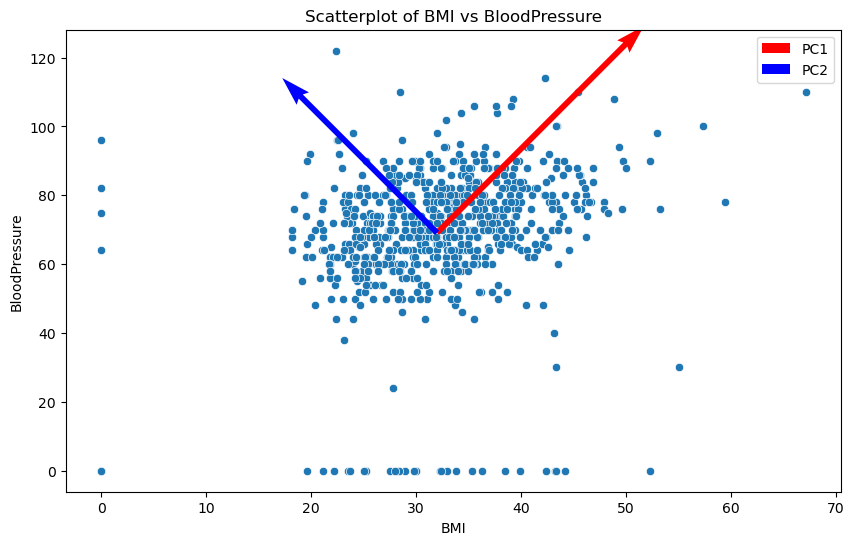

In [6]:
# Create a scatterplot for the variables "BMI" and "BloodPressure"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='BloodPressure', data=df)
plt.title('Scatterplot of BMI vs BloodPressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')

# Plot the eigenvectors
origin = [df['BMI'].mean(), df['BloodPressure'].mean()]  # Origin at the mean of the data
eigenvectors = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.quiver(*origin, eigenvectors[0, 0], eigenvectors[1, 0], color='r', scale=3, label='PC1')
plt.quiver(*origin, eigenvectors[0, 1], eigenvectors[1, 1], color='b', scale=3, label='PC2')

plt.legend()
plt.show()

#### Interpretation:
##### 1. Principal Component 1 (PC1):

The red arrow (PC1) points in the direction that maximizes the variance in the data.
PC1 is a combination of both "BMI" and "BloodPressure" with equal weights (as indicated by the eigenvector [0.70710678, 0.70710678]).
This means that PC1 captures the overall trend where both "BMI" and "BloodPressure" increase together.

##### 2. Principal Component 2 (PC2):

The blue arrow (PC2) points in the direction orthogonal (perpendicular) to PC1.
PC2 is a combination of "BMI" and "BloodPressure" with weights of opposite signs (as indicated by the eigenvector [-0.70710678, 0.70710678]).
This means that PC2 captures the contrast between "BMI" and "BloodPressure". When "BMI" increases, "BloodPressure" decreases, and vice versa.

##### 3. Variance Explanation:

The length of the arrows represents the amount of variance captured by each principal component.
PC1 captures 64.09% of the total variance, indicating it is the most significant direction in the data.
PC2 captures 35.91% of the total variance, indicating it is the second most significant direction.

#### Practical Implications:
Data Trends: The first principal component (PC1) shows the main trend in the data where both "BMI" and "BloodPressure" increase together.
Data Contrast: The second principal component (PC2) shows the secondary trend where "BMI" and "BloodPressure" vary inversely.
Dimensionality Reduction: By focusing on these two principal components, you can reduce the complexity of the data while retaining most of the important information.
Overall, the PCA scatterplot helps in understanding the main patterns and relationships in the data, which can be useful for further analysis and modeling.

